In [391]:
import os
import numpy as np
import torch
from torchvision import transforms, datasets, utils
from torch.utils.data import Dataset, DataLoader
from skimage import io, color
from PIL import Image
import random
# import matplotlib.pyplot as plt

data_transform = transforms.Compose([
        transforms.RandomSizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
#         transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                              std=[0.229, 0.224, 0.225])
    ])

target_transform = transforms.Compose([
        transforms.RandomSizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ])

data_dir = '/Users/zhaohe/workspace/data/lung_training_data'

In [417]:
class LungDataset(Dataset):
    def __init__(self, root, data_transform, target_transform):
        self.root = root
        self.data_transform = data_transform
        self.target_transform = target_transform
        self.IMAGE_EXT = ['.png', 'jpeg', 'jpg', 'bmp']
        self.seed = np.random.randint(25)
        train_list = {}
        
        for x in ['train', 'val']:
            train_list[x] = []
            for dirpath, dnames, fnames in os.walk(os.path.join(self.root, x)):
                for f in fnames:
                    if f.endswith(tuple(self.IMAGE_EXT)):
                        train_list[x].append(os.path.join(dirpath, f))

        self.images = train_list['train']
        self.targets = train_list['val']
        
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        
        image = Image.open(self.images[idx])
        target = Image.open(self.targets[idx])
        
        # just in case it is single channel
        image = image.convert('RGB')
#         target = target.convert('RGB')

        if self.data_transform:
            random.seed(self.seed)
            image = self.data_transform(image)
            
        if self.target_transform:    
            random.seed(self.seed)
            target = self.target_transform(target)
            
        return [image, target]

    
    def view(self, idx):
        fig = plt.figure()
        img, target = self.__getitem__(idx)
        
        img = img.numpy()
        target = target.numpy()
        
        ## For plt Dim must be (H,W,C)
        plt.imshow(np.transpose(img, (1,2,0)))
        plt.show()
         
        target = np.transpose(target, (1,2,0))
        target = np.squeeze(target, axis=2)
        print(target.shape)
        plt.imshow(target * 255)
        plt.show()

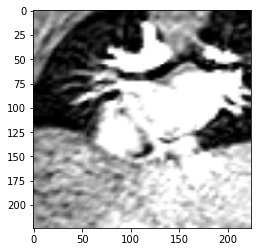

(224, 224)


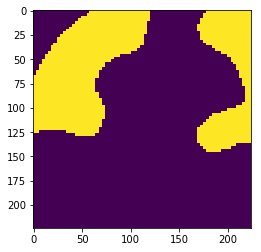

In [432]:
lung424 = LungDataset(root=data_dir, data_transform=data_transform, target_transform=target_transform)

lung424.view(1)

In [365]:
## TODO: wrap data with DataLoader
LungDataLoader = DataLoader(lung424, shuffle=True, batch_size=5)

for idx, data in enumerate(LungDataLoader):
    print(idx)
    img, target = data
    print(img.size())

0
torch.Size([5, 3, 224, 224])
1
torch.Size([5, 3, 224, 224])
2
torch.Size([5, 3, 224, 224])
3
torch.Size([5, 3, 224, 224])
4
torch.Size([5, 3, 224, 224])
5
torch.Size([5, 3, 224, 224])
6
torch.Size([5, 3, 224, 224])
7
torch.Size([5, 3, 224, 224])
8
torch.Size([5, 3, 224, 224])
9
torch.Size([5, 3, 224, 224])
10
torch.Size([5, 3, 224, 224])
11
torch.Size([5, 3, 224, 224])
12
torch.Size([5, 3, 224, 224])
13
torch.Size([5, 3, 224, 224])
14
torch.Size([5, 3, 224, 224])
15
torch.Size([5, 3, 224, 224])
16
torch.Size([5, 3, 224, 224])
17
torch.Size([5, 3, 224, 224])
18
torch.Size([5, 3, 224, 224])
19
torch.Size([5, 3, 224, 224])
20
torch.Size([5, 3, 224, 224])
21
torch.Size([5, 3, 224, 224])
22
torch.Size([5, 3, 224, 224])
23
torch.Size([5, 3, 224, 224])
24
torch.Size([5, 3, 224, 224])
25
torch.Size([5, 3, 224, 224])
26
torch.Size([5, 3, 224, 224])
27
torch.Size([5, 3, 224, 224])
28
torch.Size([5, 3, 224, 224])
29
torch.Size([5, 3, 224, 224])
30
torch.Size([5, 3, 224, 224])
31
torch.Size([5, 